# Introducrtion to Machine Learning: Assignment #2
## Submission date: 18\06\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

Submitted by:

 Raneem Ibraheem 212920896

 Selan Abu Saleh 212111439

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Logistic regression - Part 1

In this section you will build a classifier on a "toy" problem - Based on two grades, we determine if student passes the course or not.

import libraries and load dataset

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv', header=None)
df.head(8)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1


Now, lets preproccess:
- Convert dataset to numpy, make sure classes are {0,1} or {-1,1} (depends of the update rule you choose)
- Split to train & test (80-20, starify, random_state=42)
- Scale using scaler of your choice

<font color='red'>Explain here your scaler choice</font>
<br/>
<img src="scaler.png" height="300px" width="700px" />
<br />
A simple google search gave an answer for the best scaler when there are outliers, and as you can see in the graphs that i plotted, when we separate the data points, there will be many outliers relatively to the size of the dataset, therefore i chose to go with the robust scaler. I didn't choose the standard scaler because the data points aren't distributed normally, and i didn't choose the MinMax scaler because it is sensitive to outliers
<br/>
<font color="red">Note: the graphs were drawn in the cell underneath and the testing of each scaler as well, but i had to change the code to match the requirments. Also the visualization was done before converting the classes to {-1,1}</font>
<br/>
<img src="graph.png" height="300px" width="700px" />

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import scaling library

# Implement here
arr = df.values
X = arr[:,:-1]
Y = arr[:,-1]
Y = np.where(Y==0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘X’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘X’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [92]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    num_iterations = 1000

    for _ in range(num_iterations):
        z = np.dot(X, w) + b
        a = sigmoid(z)
        
        dz = a - y
        dw = (1 / m) * np.dot(X.T, dz)
        db = (1 / m) * np.sum(dz)
        
        w -= lr * dw
        b -= lr * db

    return w, b

The function 'predict' is already implemented for you. It gives a classification for a new sample (x) based on the sign of $w^\top x + b$. <br/>
You may change it if you chose to return {+1,0} instead of {+1,-1}.

In [93]:
def predict(w,b,x):
    return np.sign(np.dot(w, x.T) + b)

Call ‘Logistic_Regression_via_GD(X,y,lr)’, where ‘X’ and ‘y’ are the training data and the corresponding labels. <br/>
Run the model on the test data. With good LR you should get accuracy >= 88\%

In [94]:
chosen_lr = 0.001
w, b = Logistic_Regression_via_GD(scaled_train, y_train, chosen_lr)

preds = predict(w, b, scaled_test)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 85.0%


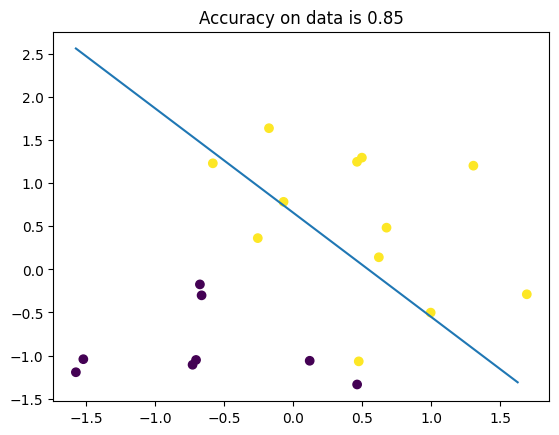

In [95]:
#@title Visualize data (on test)

import matplotlib.pyplot as plt

def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(np.min(data[:,0]), np.max(data[:,0]), 0.1)
    y = m * x + b

    plt.plot(x, y)

    preds = np.sign(np.dot(data, w)+bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

plot(scaled_test, y_test, w, b)

## Question 1 - Logistic regression - Part 2
Now we are going to work on a much realistic problem - based on IMDB review, classify whether its positive or negative review.

In [15]:
# import libraries

import gensim
from gensim.models import Word2Vec
import os

ModuleNotFoundError: No module named 'gensim'

Print first review <br/>
Tip: Click on file -> mount drive. Since the dataset is heavy (60MB), you don't want to upload it over and over each time. Then, you will be able to open it from your drive storage.

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')    # you may change the path according to your drive

print(f"The dataset shape is {df.shape}")

# print the first line
print(df.iloc[0].review)
print(df.iloc[0].sentiment)

As you can see, the input is a <b>sentence</b>. The proccess of turning words into <u>meaningful</u> continious vectors is called "tokenization" (you will learn more in DL and NLP). In the next section you will load the model and proccess the reviews to obtain continious representation for the data

In [ ]:
#@title Model loader function

MODEL_PATH = 'wordvec.model'

def load_model(data):
	if os.path.exists(MODEL_PATH):
		return gensim.models.Word2Vec.load(MODEL_PATH)
	else:
		model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1)
		model.save(MODEL_PATH)
		return model

In [ ]:
sentences = df['review'].tolist()

# turn sentences into a list. Each sentence is an array of words
tokenized_sentences = [[token for token in row.split()] for row in sentences]

# will ~3 minutes. The model is saved to a LOCAL path.
model = load_model(tokenized_sentences)     # calls to "model loader function" above.

In [ ]:
word_vectors = model.wv
print(word_vectors['wow'].shape)
print(word_vectors['wow'])

As you can see, each word has now 100 features. <br/>
For simplicity, you will represent a sentence by the mean vector of all the words within it. <br/>
Your tasks are: <br/>
- Make sure classes are {0,1} or {-1,1} (depends of the update rule you choose). You can change that row.
- Construct X to be 50000 x 100, where each row represents a sentnce.
- Convert it to numpy.

In [ ]:
y = df['sentiment'].replace({'positive': 1, 'negative': -1}).to_numpy()

# Implement here the construction of X

Split the data into 20\% test and 80\% train. After that, split the train into smaller train and 20% validation. Use stratify and random state of 42\%

In [ ]:
# Implement here

Now, scale the data <br/>
Hint: there are many wrong ways to do that scaling (on train validation and test) but only one is correct. Recall What sets are required for validation and for evaluation on test. We discussed this on the second tutorial<br/>
<font color='red'>What scaler did you choose and why?</font>

In [ ]:
# Implement here

Copy here your logistic solver from before and adjust its implementation for this problem, if required.

In [ ]:
# Implement here

Train model and evaluate on test set

In [ ]:
chosen_lr = # Add here.
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)

preds = predict(w, b, X_test)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Answer the following two questions: <br/>
- Try to justify the accuracy  you got. What should be done differently?
- How did you choose your lr? Is it the correct method?

<font color='red'>Write your answers here and explain</font>

## Question 2 - Perceptron
You are given dataset for binary classification in 2D and aim to build the best Perceptron classifier.

import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

Load data and make sure labels are appropriate for the perceptron algorithm

In [ ]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/perceptron_data.npy')

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']

# Change labels here if required.

Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. Moreover, before the return, print the number of iterations it took to converge.



In [ ]:
def perceptron(data, labels, lr = 1):
  # Implement here

In [ ]:
#@title Ploting function
def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(0.2, 0.8, 0.1)
    y = m * x + b

    plt.plot(x, y)

    preds = np.sign(np.dot(data, w)+bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

Choose LR, train and call the plotting function on the <u>train</u>
dataset. It prints the accurcay as the graph's title.
1. What is your conclusion about this data?
2. How would SVM react to such data?
3. What can you tell about the test accuracy?

<font color='red'>Write here your answers and explain it.</font>

In [ ]:
chosen_lr = # Add here
w = perceptron(X_train, y_train, chosen_lr)
w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Print the test accuracy

In [ ]:
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)
plot(X_test, y_test, w, b)

Time for some convergence theory! </br>

Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
Now, let $γ$ such that $∀i:x_i\cdot g(x_i)>\gamma$.<br/>
Then, the number of iterations required for convergence is bounded (from above) by $R^2/\gamma^2$. However, this is true only when using single batch method.

Use this theorem to find the the value of upper bound for our problem and use that exact number as upper bound. Report the train accuracy.
Did the iterations number improve?<br/>
<font color='red'>Write here your answer</font>


In [ ]:
def perceptron_updated(data, labels, lr = 1):
  # Implement here

In [ ]:
#Report the train accuracy.

chosen_lr = # Add here
w = perceptron_updated(X_train, y_train, chosen_lr)
w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Report the test accuracy. Did it improve? What can you conclude about the perceptron algorithm in the linear separable case?

In [ ]:
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)
plot(X_test, y_test, w, b)

## Question 3 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [ ]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

# Access the data as needed
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?<br/>

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Hope you answered parabola! <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [ ]:
new_features = # Implement here

model = SVC(kernel='linear', C=3)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * X{i+1})")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"

print("Hyperplane equation:")
print(f"  {equation}")

Complete the missing lines to get plots on train and test

In [ ]:
train_features = # Implement here
train_preds = # Implement here
train_acc = # Implement here

val_features = # Implement here
val_preds = # Implement here
val_acc = # Implement here

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]

new_features = # Implement here the new features construction on 'data'
Z = # Implement here the predictions of data into 2 classes, using w, b you found
Z = Z.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()

You will try also two other kernels:
  - kernel='poly', degree=4, C=3.
  -	kernel='rbf', gamma=1.5, C=3.

Based on those two models, along with the parabola, which model generalizes the best? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
from sklearn.svm import SVC

model = # Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

In [ ]:
from sklearn.svm import SVC

model = # Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=3 as before.

In [ ]:
gammas = np.arange(0.1, 4.1, 0.1)
accs = []

for gamma in gammas:
  # Implement here

plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()

Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=3? <br/>
- Did you answer to best ml generalizer changed?

<font color='red'>Write here your answers and explain it</font>

## Question 4 - 10 pts Bonus
See attached PDF in Moodle